## Machine Learning as an Iterative Process

Machine learning is inherently an iterative process, encompassing various stages from understanding the problem to deploying a model and monitoring its performance. One crucial phase in this cycle is the selection of the most appropriate algorithm for the given task. This process involves experimenting with multiple models, evaluating their performance, and refining the approach based on the results obtained. 

In the context of our project, we are comparing five distinct models to identify which best addresses our specific problem:

- **Linear Regression**: A baseline model that assumes a linear relationship between the input variables and the target variable. It's simple, interpretable, but may not capture complex patterns in data.
- **Lasso Regression**: An extension of Linear Regression that includes regularization to prevent overfitting and to perform feature selection by shrinking some coefficients to zero.
- **Ridge Regression**: Similar to Lasso, Ridge Regression also adds regularization to Linear Regression. However, it uses L2 regularization, which does not set coefficients to zero but shrinks them, making it suitable for situations where many small/medium-sized effects are expected.
- **Decision Tree**: A non-linear model that splits the data into branches to make predictions. It's intuitive and can capture complex relationships without needing feature scaling, but it's prone to overfitting.
- **Random Forest**: An ensemble method that uses multiple Decision Trees to make predictions, reducing the risk of overfitting while capturing complex patterns in the data.

The selection process involves training each of these models on our dataset, then evaluating their performance using appropriate metrics, such as R2_Score, RMSE and MSE.



## California Housing Dataset Overview

The California Housing dataset is a widely used dataset for regression tasks in machine learning. It is sourced from the StatLib repository, which is based on data from the 1990 California census. This dataset is particularly useful for predicting median house values in Californian districts, given a set of attributes. The dataset serves as an excellent example for demonstrating the application of various regression models.

### Dataset Characteristics:

- **Number of Instances:** The dataset contains 20,640 instances, each representing a district in California.
- **Number of Attributes:** There are 8 attributes (or features) in the dataset, which include:
  - `MedInc`: median income in the block
  - `HouseAge`: median house age in the block
  - `AveRooms`: average number of rooms per household
  - `AveBedrms`: average number of bedrooms per household
  - `Population`: block population
  - `AveOccup`: average number of household members
  - `Latitude`: block latitude
  - `Longitude`: block longitude
- **Target Variable:** The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars (`$100,000`).

### Potential Applications:

The California Housing dataset is primarily used for regression analysis, aiming to predict the median house value based on other housing and demographic statistics. It is an excellent resource for:
- Demonstrating basic to advanced regression techniques.
- Practicing data preprocessing and feature engineering, such as handling missing values, feature scaling, and transformation.
- Comparing the performance of different regression models, including Linear Regression, Decision Trees, Random Forests, and Gradient Boosting Machines.

### Importing the Dataset:

The dataset can be easily loaded for use in Python using the `sklearn.datasets` module:

```python
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


## Importing Necessary Libraries

Before diving into the analysis and model building, it's crucial to import the necessary Python libraries that will be used throughout this project. These libraries provide a range of functionalities, from data manipulation and analysis to visualization and machine learning modeling. Below is a list of commonly used libraries and their import statements:

### Core Libraries:

- **Numpy**: Provides support for efficient numerical computations.
- **Pandas**: Offers data structures and tools for effective data manipulation and analysis.

```python
import numpy as np
import pandas as pd


In [68]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Importing the California Housing Dataset

The California Housing dataset is a popular dataset for regression tasks, providing information on the housing market in California. This section covers how to load this dataset into our working environment, using the `fetch_california_housing` function from `sklearn.datasets`, and the initial steps to explore the dataset.




In [16]:

california = fetch_california_housing()
X = california.data
y = california.target
columns = california.feature_names

#convert the data into a pandas dataframe
df = pd.DataFrame(california.data, columns=columns)
df['Price'] = california.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Cleaning: Checking for Missing Values and Duplicates

Ensuring the quality of the dataset is a critical step in any data analysis or machine learning project. This involves checking for and handling any missing values and duplicates that could potentially skew the analysis or model performance.

### Checking for Missing Values

Missing values in the dataset can lead to inaccurate analyses and predictions. It's important to identify and decide how to handle them, whether by imputation, deletion, or some other method.


In [58]:
#check for missing values
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [59]:
#check for duplicate values
df.duplicated().sum()



0


## Defining Feature and Target Variables

After importing and cleaning our dataset, the next step is to define our feature variables (`X`) and the target variable (`y`). In the context of the California Housing dataset, our target variable is `Price`, which represents the median house value for each district.

In [61]:
# feature variables and target variable
X = df.drop('Price', axis=1)
y = df['Price']

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


## Splitting the Dataset

To ensure that our machine learning models generalize well to new, unseen data, it's essential to split our dataset into separate training and testing sets. This approach allows us to train our models on one subset of the data and then evaluate their performance on a different subset that they haven't seen during the training process.

### Importance of Dataset Splitting

- **Training Set**: Used to train the machine learning model. It includes both the input features and the corresponding target values.
- **Testing Set**: Used to evaluate the performance of the model. It helps to assess how well our model has learned from the training set and how it performs on new, unseen data.

### Best Practices

- A common split ratio is 80% of the data for training and 20% for testing, but this can vary based on the dataset size and specific requirements of the project.
- It's important to ensure that both sets represent the overall distribution of the data to avoid biases.




In [62]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(16512, 8)
(4128, 8)
(16512,)
(4128,)


## Training Machine Learning Models

After preparing our dataset and splitting it into training and testing sets, the next step in our machine learning project is to train models using different algorithms. This process involves fitting each model to the data in the training set and tuning it to make accurate predictions. We'll explore several algorithms to find the best performer for our specific problem.

### Selected Algorithms

For this project, we are considering the following algorithms:

- **Linear Regression**
- **Lasso Regression**
- **Ridge Regression**
- **Decision Tree**
- **Random Forest**




## Linear Regression Overview

Linear Regression is one of the most fundamental algorithms in machine learning for regression tasks. It attempts to model the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables) by fitting a linear equation to observed data. The key goal of Linear Regression is to find the linear line that best predicts the dependent variable.

### Benefits of Linear Regression

- **Simplicity**: Linear Regression is straightforward to understand and explain, making it a great starting point for regression tasks.
- **Interpretability**: The coefficients of the model provide insights into the importance of each feature.
- **Fast to Train**: It's computationally efficient, making it suitable for problems with a large number of features.

Mean Squared Error: 0.5558915986952441
R2 Score: 0.575787706032451
Root Mean Squared Error: 0.7455813830127762


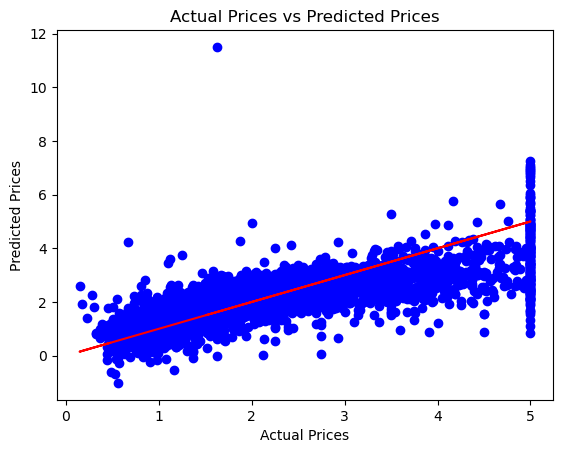

In [63]:


#instantiate the model
LinReg = LinearRegression()

#fit the model
LinReg.fit(X_train, y_train)

#make predictions
y_pred = LinReg.predict(X_test)

#evaluate the model
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Squared Error:', mse_linear)
print('R2 Score:', r2_linear)
print('Root Mean Squared Error:', rmse_linear)

#plot the predictions
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()



## Lasso Regression Overview

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The Lasso performs variable selection and regularization while also allowing for the automatic exclusion of non-important features. It does this by imposing a penalty on the absolute size of the coefficients, which can lead to some coefficients being exactly zero. This property makes Lasso Regression very useful when we have a high number of features, some of which might be irrelevant to the prediction.

### Benefits of Lasso Regression

- **Feature Selection**: Automatically performs feature selection by setting coefficients of less important features to zero.
- **Regularization**: Helps prevent overfitting by adding a penalty on the size of coefficients.
- **Model Interpretability**: Results in simpler, more interpretable models due to feature selection.


Mean Squared Error: 0.6135115198058131
R2 Score: 0.5318167610318159
Root Mean Squared Error: 0.7832697618354822


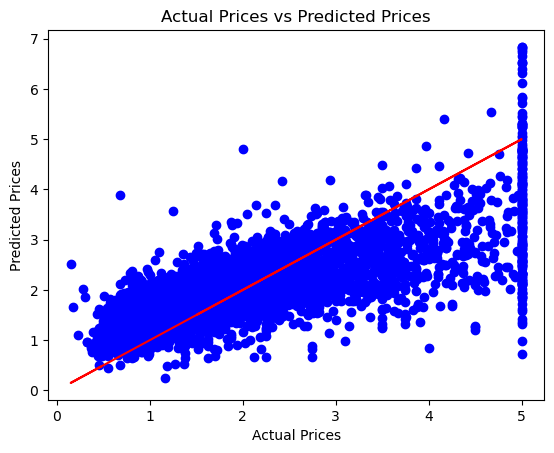

In [55]:
#instantiate the lasso model
lasso = Lasso(alpha=0.1)

#fit the model
lasso.fit(X_train, y_train)

#make predictions
y_pred_lasso = lasso.predict(X_test)

#evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print('Mean Squared Error:', mse_lasso)
print('R2 Score:', r2_lasso)
print('Root Mean Squared Error:', rmse_lasso)

#plot the predictions
#plot the predictions
plt.scatter(y_test, y_pred_lasso, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()





## Ridge Regression Overview

Ridge Regression, also known as Tikhonov regularization, is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated. By introducing a penalty term (α) to the sum of the square of the coefficients, Ridge Regression reduces model complexity and prevents overfitting, which may result from simple linear regression.

### Benefits of Ridge Regression

- **Regularization**: Adds regularization to the model, thus preventing overfitting by penalizing large coefficients.
- **Handling Multicollinearity**: Effectively deals with multicollinearity (independent variables that are highly correlated) by distributing the coefficient weight among them.
- **Model Stability**: The addition of a penalty term stabilizes the coefficients, making the model less sensitive to small changes in the training data.

Mean Squared Error: 0.55588275431138
R2 Score: 0.5757944553633934
Root Mean Squared Error: 0.7455754517896763


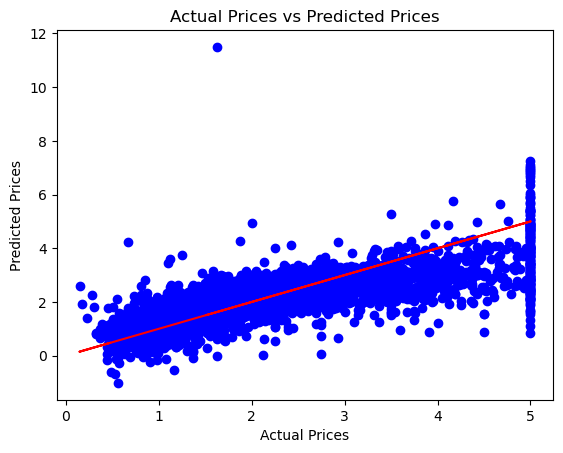

In [47]:
#instantiate the ridge model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)

#fit the model
ridge.fit(X_train, y_train)

#make predictions
y_pred_ridge = ridge.predict(X_test)

#evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print('Mean Squared Error:', mse_ridge)
print('R2 Score:', r2_ridge)
print('Root Mean Squared Error:', rmse_ridge)

# Plot the predictions
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


## Decision Tree Overview

Decision Tree Regression is a non-linear model that uses a tree-like model of decisions and their possible consequences. It's a part of supervised learning algorithms that is used for predicting continuous numerical values. Decision Tree regression models are built through a process of binary recursive partitioning, where the dataset is split into branches based on decision nodes. These nodes are determined by the values of the input features that result in the highest reduction in variance (for regression tasks).

### Benefits of Decision Tree Regression

- **Interpretability**: Decision Trees are easy to understand and interpret, making them valuable for decision-making processes.
- **Handling Non-Linear Relationships**: Capable of capturing non-linear relationships between features and the target variable without needing transformation.
- **Feature Importance**: Provides insights into which features are most important in predicting the target variable.

Mean Squared Error: 0.495235205629094
R2 Score: 0.622075845135081
Root Mean Squared Error: 0.7037294974840077


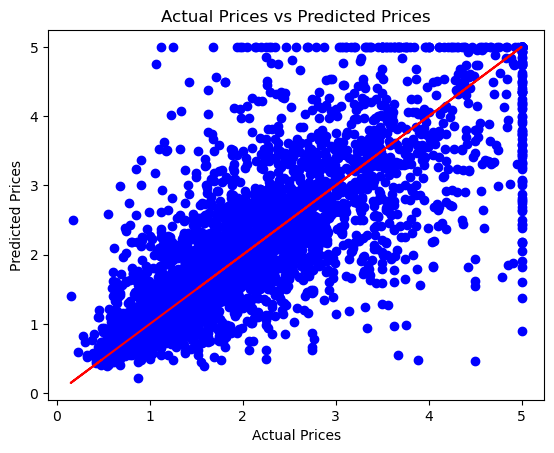

In [51]:
#instantiate the decision tree model
dt = DecisionTreeRegressor( random_state=42)

#fit the model
dt.fit(X_train, y_train)

#make predictions
y_pred_dt = dt.predict(X_test)

#evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print('Mean Squared Error:', mse_dt)
print('R2 Score:', r2_dt)
print('Root Mean Squared Error:', rmse_dt)

#plot the predictions

plt.scatter(y_test, y_pred_dt, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


## Random Forest Overview

Random Forest Regression is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the average prediction of the individual trees. It combines the simplicity of decision trees with flexibility, resulting in a higher level of accuracy. Random Forest can handle a large dataset with higher dimensionality and can evaluate the importance of features.

### Benefits of Random Forest Regression

- **Accuracy**: Generally provides high accuracy through ensemble learning by averaging multiple decision trees to reduce overfitting and variance.
- **Feature Importance**: Automatically evaluates the importance of each feature in the prediction, providing insights into the dataset.
- **Versatility**: Can be used for both regression and classification tasks and handle missing values.

Mean Squared Error: 0.2553684927247781
R2 Score: 0.8051230593157366
Root Mean Squared Error: 0.5053399773665033


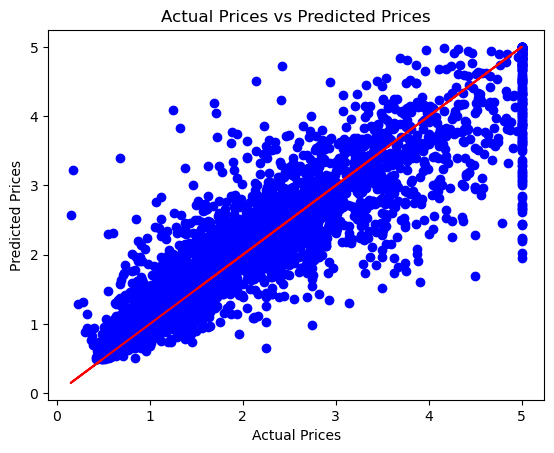

In [52]:
#instantiate the random forest model
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#fit the model
rf.fit(X_train, y_train)

#make predictions
y_pred_rf = rf.predict(X_test)

#evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('Mean Squared Error:', mse_rf)
print('R2 Score:', r2_rf)
print('Root Mean Squared Error:', rmse_rf)


# Plot the predictions
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()







If the points in the plot are close to a diagonal line from the bottom-left to the top-right of the plot, it suggests that the predicted values are close to the actual values, indicating a good model performance. If the points are scattered far from this line, it indicates that the model’s predictions are often far from the actual values.

**Mean Squared Error (MSE)**

This is the average of the squared differences between the actual and predicted values. Your MSE is 0.2553684927247781, which means that the average squared difference between your model’s predictions and the actual values is approximately 0.255. The closer this value is to 0, the better.

**R2 Score**

Also known as the coefficient of determination, this metric quantifies the proportion of the variance in the dependent variable that is predictable from the independent variables. Given an R2 score of 0.8051230593157366, which means approximately 80.51% of the variance in your target variable can be explained by your features. The best possible score is 1.0, indicating a perfect fit.

**Root Mean Squared Error (RMSE)**

This is the square root of the MSE. It can be interpreted as the standard deviation of the residuals (prediction errors). RMSE is 0.5053399773665033, which means on average, your predictions are approximately 0.505 units away from the actual values. The closer this value is to 0, the better.

## Comparing the five models

In [64]:
#compare the performance of the models
models = [('Linear', mse_linear, r2_linear, rmse_linear),
          ('Lasso', mse_lasso, r2_lasso, rmse_lasso),
          ('Ridge', mse_ridge, r2_ridge, rmse_ridge),
          ('DT', mse_dt, r2_dt, rmse_dt),
          ('RF', mse_rf, r2_rf, rmse_rf)]

model_comparison = pd.DataFrame(models, columns=['Model', 'MSE', 'R2 Score', 'RMSE'])

model_comparison

,Model,MSE,R2 Score,RMSE
0,Linear,0.555892,0.575788,0.745581
1,Lasso,0.613512,0.531817,0.783270
2,Ridge,0.555883,0.575794,0.745575
3,DT,0.495235,0.622076,0.703729
4,RF,0.255368,0.805123,0.505340


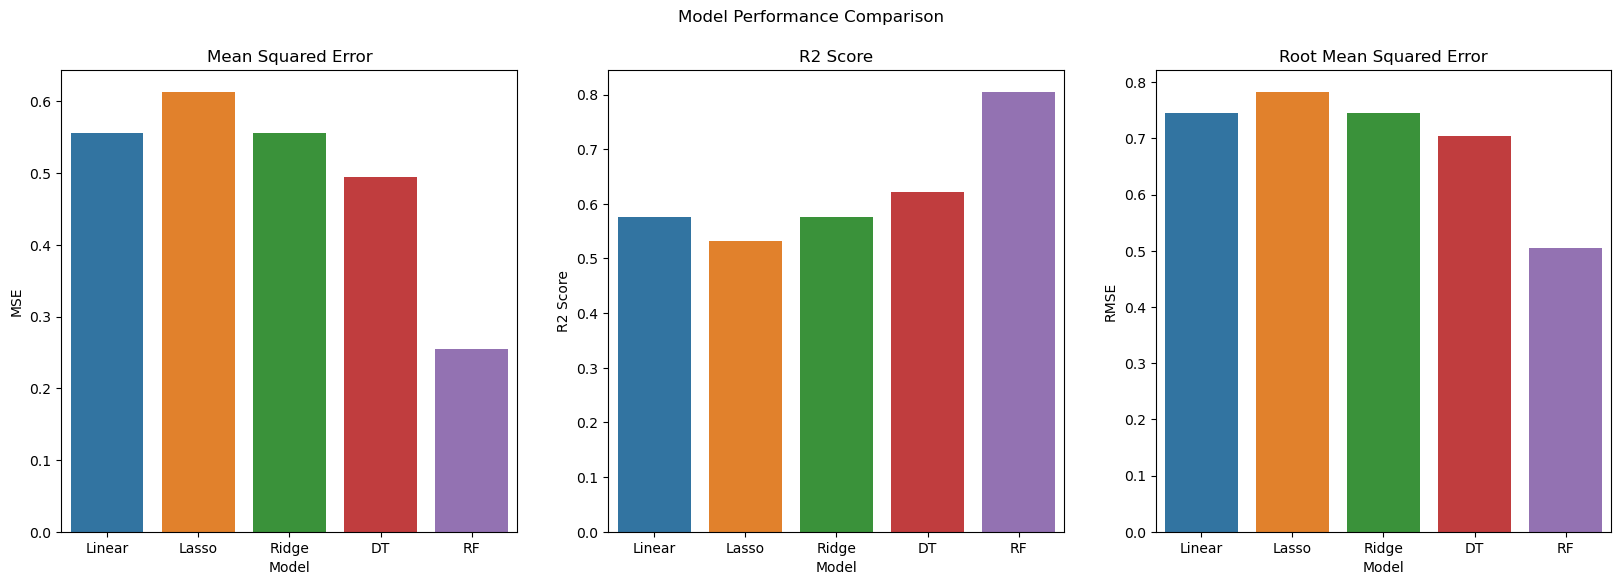

In [67]:
#plot the performance of the models using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Comparison')

sns.barplot(x='Model', y='MSE', data=model_comparison, ax=ax[0])
ax[0].set_title('Mean Squared Error')

sns.barplot(x='Model', y='R2 Score', data=model_comparison, ax=ax[1])
ax[1].set_title('R2 Score')

sns.barplot(x='Model', y='RMSE', data=model_comparison, ax=ax[2])
ax[2].set_title('Root Mean Squared Error')

plt.show()


## Final Model Choice: Random Forest Regression

After careful analysis, the **Random Forest Regression model** emerged as the clear winner, exhibiting superior performance across all metrics. With the lowest MSE (0.255368), the highest R² Score (0.805123), and the lowest RMSE (0.505340), the Random Forest model demonstrates exceptional predictive accuracy and model robustness. Its ensemble approach, which averages predictions across numerous decision trees, significantly reduces the risk of overfitting while capturing complex patterns in the data.
